# __Immigration__

### Importing required libraries

In [1]:
#Run this only once
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer as Counter
from sklearn.feature_extraction import text as TExT
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

# Immigration is divided into _four_ subcategories: 

# __3. Security check:__

In [2]:
#Importing dataset
df = pd.read_csv("/Users/harshith/Downloads/Week 3 - New/Immigration/security check.csv")
df.head()

,full_text,sentiment
0,bangalore airport security check is so organ...,Positive
1,bangalore airport security check process is on...,Positive
2,and finally with help of friends booked qatar ...,Positive
3,he was beside me in bangalore airport security...,Positive
4,again at bangalore airport security check toda...,Neutral


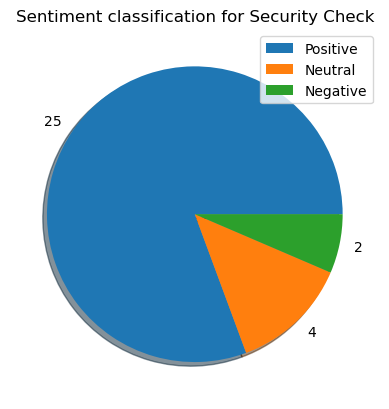

In [3]:
#Counting different sentiments
val = df['sentiment'].value_counts()
sentiments = val.index
security_count = val.values

#Plotting a pie chart
plt.pie(security_count, labels = security_count, shadow= True)
plt.title("Sentiment classification for Security Check")
plt.legend(labels=sentiments)
plt.show()

## a.Topic modelling and wordcloud for positive tweets regarding security check:

### Topic Modelling

In [4]:
##Topic Modelling
#Extracting Positive tweets
positive_reviews = df[df.sentiment == "Positive"]

#Combining reviews into a list
positive_reviews = positive_reviews['full_text'].tolist()

#Creating custom stop words
custom = []
#Adding custom stopwords to predefined list of stopwords
stop_words = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 2,stop_words = stop_words)
V = vector.fit_transform(positive_reviews)

#Appyling LDA for Topic modelling
n_topic = 10
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 10
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: delhi, flight, reach, modi, really, traffic, reached, just, bottles, use
Topic 2: reached, just, bottles, flight, use, travelling, today, hand, bag, didn
Topic 3: mumbai, help, bag, reached, just, bottles, flight, use, travelling, today
Topic 4: bag, today, just, hand, use, asked, took, didn, delhi, flight
Topic 5: things, bag, really, use, reached, just, bottles, flight, travelling, today
Topic 6: process, reached, just, bottles, flight, use, travelling, today, hand, bag
Topic 7: pm, traffic, reached, just, bottles, flight, use, travelling, today, hand
Topic 8: flight, chennai, reached, bottles, just, reach, asked, pm, help, use
Topic 9: travelling, international, reached, just, bottles, flight, use, today, hand, bag
Topic 10: flight, didn, chennai, let, did, frm, modi, took, hand, things


/Users/harshith/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Word Cloud

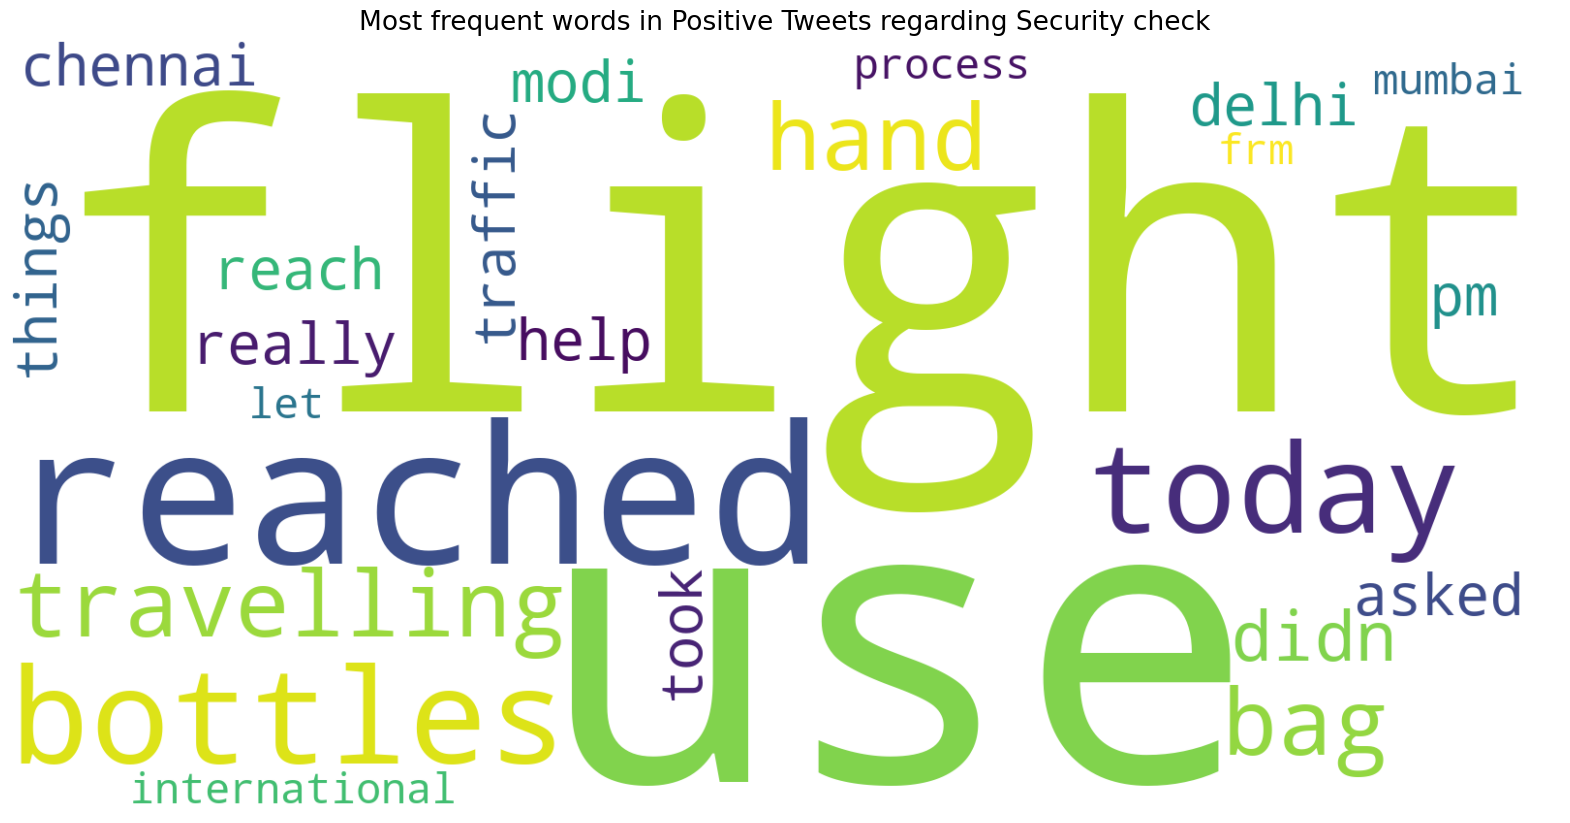

In [5]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Positive Tweets regarding Security check', fontsize=19)
plt.show()

### Observation 1: Positive notes regarding Security check
#### 1. Helpful staff and friendly security officers are appreciated in a lot of tweets
#### 2. People have pointed out that the organized process has made it easier to travel

## b.Topic modelling and wordcloud for negative tweets regarding security check:

### Topic Modelling

In [6]:
##Topic Modelling
#Extracting Positive tweets
negative_reviews = df[df.sentiment == "Negative"]

#Combining reviews into a list
negative_reviews = negative_reviews['full_text'].tolist()

#Creating custom stop words
custom = []
#Adding custom stopwords to predefined list of stopwords
stop = TExT.ENGLISH_STOP_WORDS.union(custom)

#Vectorizing the text data
vector = Counter(max_df=0.95,min_df = 1,stop_words = stop)
V = vector.fit_transform(negative_reviews)

#Appyling LDA for Topic modelling
n_topic = 3
LDA = LatentDirichletAllocation(n_components = n_topic,random_state = 42)
LDA.fit(V)

#Extracting top words from each topic
n_words = 5
featured_names = vector.get_feature_names()
topics = []

for topic_idx, topic in enumerate(LDA.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [featured_names[i] for i in top_words_idx]
    topics.append(top_words)

#Printing the topics obtained
for i,topic in enumerate(topics):
    print(f"Topic {i+1}: {', '.join(topic)}")

Topic 1: accumulated, slow, pathetically, morning, mess
Topic 2: bomb, guards, today, threat, apparently
Topic 3: accumulated, slow, pathetically, morning, mess


### Word Cloud

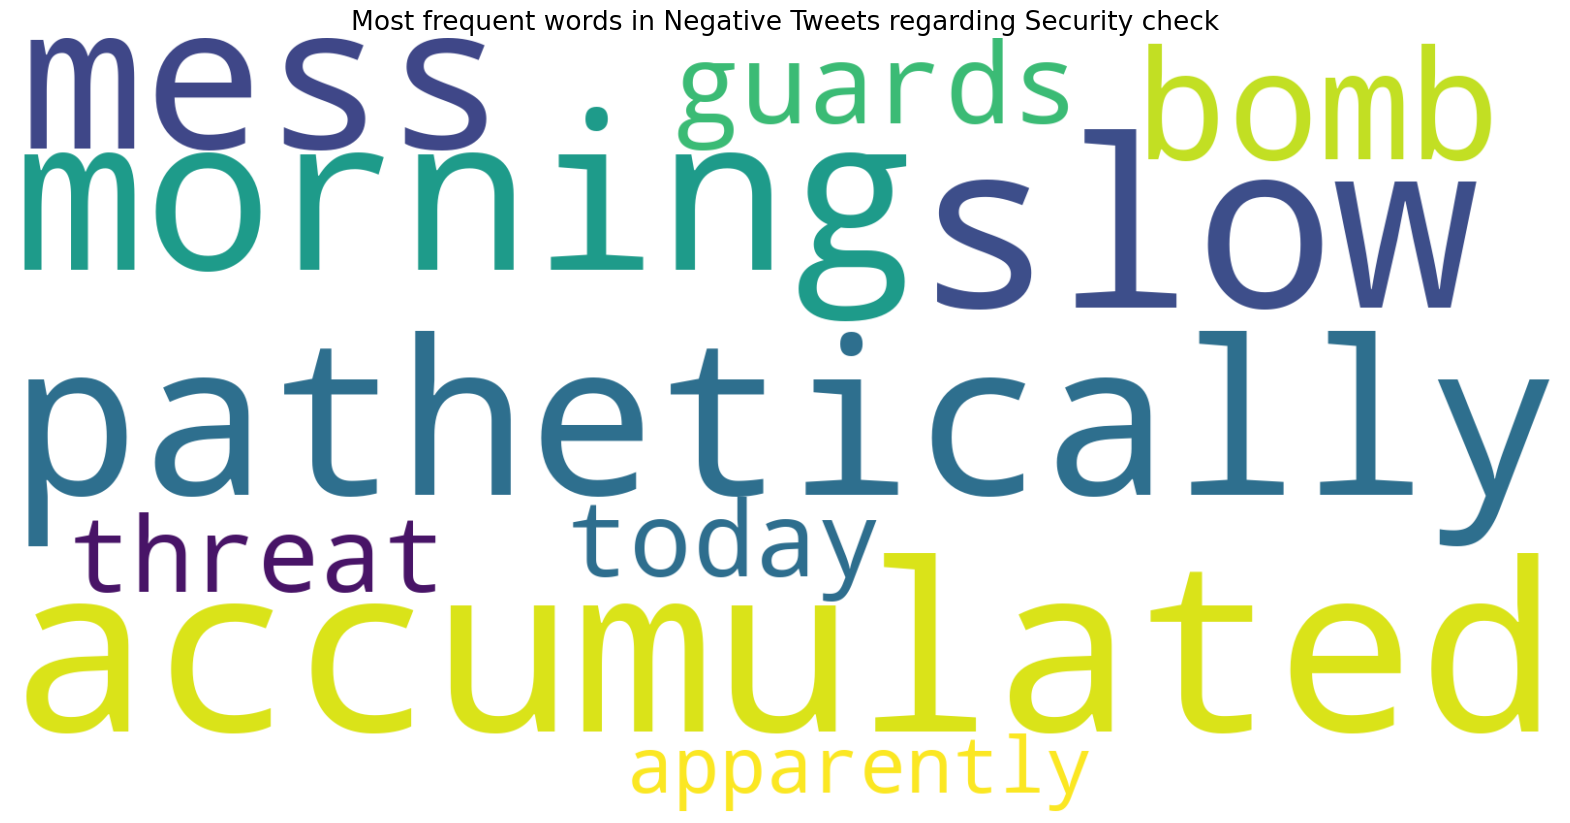

In [8]:
##Worldcloud
res = [' '.join(ele) for ele in topics]
text = ' '.join([word for word in res])
plt.figure(figsize=(20,15))
wordcloud= WordCloud(max_words=500, width=1600, height=800,background_color = 'white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative Tweets regarding Security check', fontsize=19)
plt.show()

### Observation 2: Negative notes regarding security check
#### 1. Unnecessary security checks and enquiry by the officers on a bias is pointed out
#### 2. People have complained about slow security check process 
#### 3. Travellers have faced False Allegations of carrying explosives, therefore had to undergo special security checks
#### 4. People also have concerns about the type of food they are allowed to carry